<a href="https://colab.research.google.com/github/Ishita95-harvad/-Play-Market-2025---1M-Reviews-500-Titles-/blob/main/Play_Market_2025_1M_Reviews%2C_500%2B_Titles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Play Market 2025 - 1M Reviews, 500+ Titles**
Cleaned reviews, scores, downloads & metadata from Google Play apps and games.

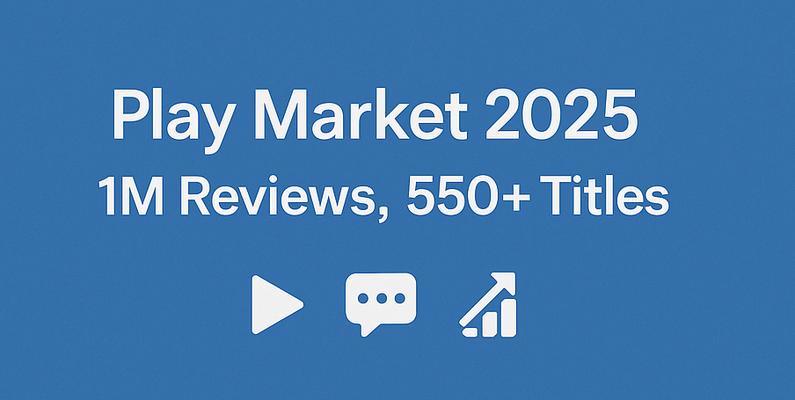



---



# Task
execute

Here is all the data you need:
"apps_info.csv"
"apps_reviews.csv"
"games_info.csv"
"games_reviews.csv"

## Data loading

### Subtask:
Load the four datasets into pandas DataFrames.


**Reasoning**:
Load the four datasets into pandas DataFrames and display the first 5 rows of each.



In [1]:
import pandas as pd

try:
    df_apps_info = pd.read_csv('apps_info.csv')
    df_apps_reviews = pd.read_csv('apps_reviews.csv')
    df_games_info = pd.read_csv('games_info.csv')
    df_games_reviews = pd.read_csv('games_reviews.csv')

    display(df_apps_info.head())
    display(df_apps_reviews.head())
    display(df_games_info.head())
    display(df_games_reviews.head())

except FileNotFoundError:
    print("One or more CSV files not found.")
except pd.errors.EmptyDataError:
    print("One or more CSV files are empty.")
except pd.errors.ParserError:
    print("Error parsing one or more CSV files.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

app_id                        app_name  \
0       1    Western Union Send Money Now   
1       2  Priceline: Hotel, Flight & Car   
2       3                           Slack   
3       4                       MyWalmart   
4       5            Fidelity Investments   

                                         description  score  ratings_count  \
0  Enjoy a $0 transfer fee* on your next online i...    4.6         317000   
1  Save on your next trip with exclusive deals on...    4.7         502000   
2  Slack brings team communication and collaborat...    3.4         134000   
3  Introducing MyWalmart, the one app designed fo...    4.7         211000   
4  Invest at a firm invested in you. Fidelity’s s...    4.6         182000   

   downloads content_rating          section      categories  
0   10000000       Everyone  Budgeting tools         Finance  
1   10000000       Everyone   Business tools  Travel & Local  
2   10000000       Everyone   Business tools        Business  
3    1000000       Everyone   Business tools        Business  
4    5000000       Everyone   Business tools         Finance

app_id                                        review_text  review_score  \
0       1  I don't know what happened to this app. It was...             1   
1       1  app was good. then the randomly locked my acco...             1   
2       1  Terrible user interface 🤬 Menus cluttered. App...             1   
3       1  I got this app to send money quickly without h...             1   
4       1  You're honestly better off using another app o...             1   

  review_date  helpful_count  
0  2025-04-03              6  
1  2025-04-13              3  
2  2025-03-17             48  
3  2025-02-01             23  
4  2024-12-19             22

game_id                       game_name  \
0        1           Geometry Dash SubZero   
1        2   Word Collect - Word Games Fun   
2        3                        Tap Away   
3        4  Sudoku - Classic Sudoku Puzzle   
4        5   Woodber - Classic Number Game   

                                         description  score  ratings_count  \
0  Geometry Dash is back with a brand new adventu...    4.5         926000   
1  Download the best word games Free in Word Coll...    4.7         588000   
2  Do you have what it takes to solve all the swi...    4.3        1130000   
3  Enjoy the Classic Sudoku Puzzle Game for free!...    4.7        2650000   
4  Woodber - perfect combination of classic numbe...    4.6         225000   

   downloads content_rating            section  \
0  100000000       Everyone  Abstract graphics   
1   10000000       Everyone  Abstract graphics   
2   50000000       Everyone  Abstract graphics   
3   50000000       Everyone  Abstract graphics   
4   10000000       Everyone  Abstract graphics   

                                          categories  
0  Action, Platformer, Runner, Arcade, Single pla...  
1  #10 top grossing word, Word, Search, Single pl...  
2  Puzzle, Logic, Casual, Single player, Abstract...  
3  Puzzle, Logic, Sudoku, Casual, Single player, ...  
4  Puzzle, Logic, Casual, Single player, Abstract...

game_id                                        review_text  review_score  \
0        1  too many ads for a game where you die a lot, g...             1   
1        1  I really love this game and its music. But at ...             1   
2        1  The app is cool in general. BUT this is meant ...             1   
3        1  I'm gonna say I hate this game so much! Ads al...             1   
4        1  This game is great, except.... It has 30 secon...             1   

  review_date  helpful_count  
0  2025-04-13              2  
1  2023-07-28           3963  
2  2024-11-04             24  
3  2020-11-13            158  
4  2019-02-28             73

## Data exploration

### Subtask:
Explore the loaded datasets to understand their structure, data types, and potential issues.


**Reasoning**:
I need to explore the dataframes to understand their structure, data types, and potential issues, such as missing values and data types. I will use .info(), .describe(), .shape, and calculate the percentage of missing values for each column. I will also examine unique values for categorical columns and visually inspect text columns.



In [2]:
# Inspect the dataframes
def inspect_dataframe(df, df_name):
    print(f"--- {df_name} ---")
    print("Shape:", df.shape)
    display(df.info())
    display(df.describe(include='all'))

    # Missing values
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    print("Missing Values Percentage:\n", missing_percentage)

    # Categorical columns exploration
    for col in df.select_dtypes(include=['object']):
        if col not in ['review_text', 'description']:
          print(f"\n--- Unique values and frequencies for column '{col}' ---")
          print(df[col].value_counts())

    # Sample text data inspection
    if 'review_text' in df.columns:
        print("\n--- Sample Review Text ---")
        for i in range(3):
            print(f"Review {i+1}:\n{df['review_text'].iloc[i][:200]}...\n")
    if 'description' in df.columns:
        print("\n--- Sample Description ---")
        for i in range(3):
            print(f"Description {i+1}:\n{df['description'].iloc[i][:200]}...\n")

inspect_dataframe(df_apps_info, "df_apps_info")
inspect_dataframe(df_apps_reviews, "df_apps_reviews")
inspect_dataframe(df_games_info, "df_games_info")
inspect_dataframe(df_games_reviews, "df_games_reviews")

--- df_apps_info ---
Shape: (217, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          217 non-null    int64  
 1   app_name        217 non-null    object 
 2   description     217 non-null    object 
 3   score           217 non-null    float64
 4   ratings_count   217 non-null    int64  
 5   downloads       217 non-null    int64  
 6   content_rating  217 non-null    object 
 7   section         217 non-null    object 
 8   categories      217 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ KB


None

app_id                      app_name  \
count   217.000000                           217   
unique         NaN                           217   
top            NaN  Western Union Send Money Now   
freq           NaN                             1   
mean    109.000000                           NaN   
std      62.786676                           NaN   
min       1.000000                           NaN   
25%      55.000000                           NaN   
50%     109.000000                           NaN   
75%     163.000000                           NaN   
max     217.000000                           NaN   

                                              description       score  \
count                                                 217  217.000000   
unique                                                217         NaN   
top     Enjoy a $0 transfer fee* on your next online i...         NaN   
freq                                                    1         NaN   
mean                                                  NaN    4.405069   
std                                                   NaN    0.426465   
min                                                   NaN    1.900000   
25%                                                   NaN    4.300000   
50%                                                   NaN    4.500000   
75%                                                   NaN    4.700000   
max                                                   NaN    4.900000   

        ratings_count     downloads content_rating       section  \
count    2.170000e+02  2.170000e+02            217           217   
unique            NaN           NaN              4            12   
top               NaN           NaN       Everyone  Popular apps   
freq              NaN           NaN            152           200   
mean     2.803914e+06  3.895668e+08            NaN           NaN   
std      8.065644e+06  1.261960e+09            NaN           NaN   
min      6.140000e+03  1.000000e+06            NaN           NaN   
25%      1.880000e+05  1.000000e+07            NaN           NaN   
50%      5.650000e+05  1.000000e+07            NaN           NaN   
75%      2.130000e+06  1.000000e+08            NaN           NaN   
max      1.010000e+08  1.000000e+10            NaN           NaN   

           categories  
count             217  
unique            100  
top     Entertainment  
freq               25  
mean              NaN  
std               NaN  
min               NaN  
25%               NaN  
50%               NaN  
75%               NaN  
max               NaN

Missing Values Percentage:
 app_id            0.0
app_name          0.0
description       0.0
score             0.0
ratings_count     0.0
downloads         0.0
content_rating    0.0
section           0.0
categories        0.0
dtype: float64

--- Unique values and frequencies for column 'app_name' ---
app_name
Western Union Send Money Now      1
Priceline: Hotel, Flight & Car    1
Slack                             1
MyWalmart                         1
Fidelity Investments              1
                                 ..
Target                            1
TikTok Studio                     1
Okta Verify                       1
Smart Home Manager                1
Frontier Airlines                 1
Name: count, Length: 217, dtype: int64

--- Unique values and frequencies for column 'content_rating' ---
content_rating
Everyone        152
Teen             52
Mature 17+       12
Everyone 10+      1
Name: count, dtype: int64

--- Unique values and frequencies for column 'section' ---
sectio

None

app_id review_text   review_score review_date  helpful_count
count   466700.000000      466700  466700.000000      466700  466700.000000
unique            NaN      458737            NaN        5356            NaN
top               NaN        Good            NaN  2025-04-02            NaN
freq              NaN          70            NaN         760            NaN
mean        83.638290         NaN       2.973788         NaN      13.545132
std         69.396137         NaN       1.508177         NaN     179.613284
min          1.000000         NaN       1.000000         NaN       0.000000
25%         14.000000         NaN       1.000000         NaN       0.000000
50%         58.000000         NaN       3.000000         NaN       0.000000
75%        140.000000         NaN       4.000000         NaN       2.000000
max        217.000000         NaN       5.000000         NaN   25518.000000

Missing Values Percentage:
 app_id           0.0
review_text      0.0
review_score     0.0
review_date      0.0
helpful_count    0.0
dtype: float64

--- Unique values and frequencies for column 'review_date' ---
review_date
2025-04-02    760
2025-03-20    754
2025-04-03    739
2024-12-05    736
2025-04-04    721
             ... 
2012-12-05      1
2014-01-14      1
2014-10-28      1
2014-10-25      1
2013-03-15      1
Name: count, Length: 5356, dtype: int64

--- Sample Review Text ---
Review 1:
I don't know what happened to this app. It was super on point up until a year or so ago. Can't do quick resend of money unless I go back to ones I did in early 2024. Finally got my points when they "f...

Review 2:
app was good. then the randomly locked my account a couple days ago demanding a lot of personal information about myself and the people I am sending money too and my relationship with them, as well as...

Review 3:
Terrible user interface 🤬 Menus cluttered. App display is garbled and/

None

game_id                       game_name  \
count   335.0000                             335   
unique       NaN                             334   
top          NaN  Sudoku - Classic Sudoku Puzzle   
freq         NaN                               2   
mean    168.0000                             NaN   
std      96.8504                             NaN   
min       1.0000                             NaN   
25%      84.5000                             NaN   
50%     168.0000                             NaN   
75%     251.5000                             NaN   
max     335.0000                             NaN   

                                              description       score  \
count                                                 335  335.000000   
unique                                                335         NaN   
top     Immerse yourself in the ultimate zombie apocal...         NaN   
freq                                                    1         NaN   
mean                                                  NaN    4.425970   
std                                                   NaN    0.345562   
min                                                   NaN    2.500000   
25%                                                   NaN    4.300000   
50%                                                   NaN    4.500000   
75%                                                   NaN    4.600000   
max                                                   NaN    5.000000   

        ratings_count     downloads content_rating              section  \
count    3.350000e+02  3.350000e+02            335                  335   
unique            NaN           NaN              4                   26   
top               NaN           NaN       Everyone  Explore games on PC   
freq              NaN           NaN            190                   71   
mean     1.336289e+06  5.558720e+07            NaN                  NaN   
std      3.657874e+06  1.430595e+08            NaN                  NaN   
min      5.800000e+01  1.000000e+03            NaN                  NaN   
25%      3.795000e+04  1.000000e+06            NaN                  NaN   
50%      1.890000e+05  1.000000e+07            NaN                  NaN   
75%      1.040000e+06  5.000000e+07            NaN                  NaN   
max      4.280000e+07  1.000000e+09            NaN                  NaN   

       categories  
count         335  
unique        318  
top        Puzzle  
freq            5  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

Missing Values Percentage:
 game_id           0.0
game_name         0.0
description       0.0
score             0.0
ratings_count     0.0
downloads         0.0
content_rating    0.0
section           0.0
categories        0.0
dtype: float64

--- Unique values and frequencies for column 'game_name' ---
game_name
Sudoku - Classic Sudoku Puzzle    2
Idle Airport Empire               1
Lucky Offense                     1
Dopples World                     1
Simon's Cat Match!                1
                                 ..
Traffic Rider                     1
Mahjong Epic                      1
Hexa Sort                         1
Chainsaw Juice King: Idle Shop    1
Worms Zone .io - Hungry Snake     1
Name: count, Length: 334, dtype: int64

--- Unique values and frequencies for column 'content_rating' ---
content_rating
Everyone        190
Teen             77
Everyone 10+     58
Mature 17+       10
Name: count, dtype: int64

--- Unique values and frequencies for column 'section' ---
sect

None

game_id review_text   review_score review_date  helpful_count
count   583170.000000      583170  583170.000000      583170  583170.000000
unique            NaN      569450            NaN        4081            NaN
top               NaN        Good            NaN  2025-02-28            NaN
freq              NaN         223            NaN        1595            NaN
mean       143.599643         NaN       3.129635         NaN      48.328897
std         89.428723         NaN       1.481319         NaN    1903.641507
min          1.000000         NaN       1.000000         NaN       0.000000
25%         56.000000         NaN       2.000000         NaN       0.000000
50%        140.000000         NaN       3.000000         NaN       1.000000
75%        220.000000         NaN       5.000000         NaN       4.000000
max        335.000000         NaN       5.000000         NaN  544240.000000

Missing Values Percentage:
 game_id          0.0
review_text      0.0
review_score     0.0
review_date      0.0
helpful_count    0.0
dtype: float64

--- Unique values and frequencies for column 'review_date' ---
review_date
2025-02-28    1595
2025-03-01    1403
2025-03-02    1330
2025-04-09    1239
2025-02-26    1178
              ... 
2015-10-28       1
2015-08-31       1
2015-09-05       1
2016-07-13       1
2015-09-11       1
Name: count, Length: 4081, dtype: int64

--- Sample Review Text ---
Review 1:
too many ads for a game where you die a lot, getting an ad every 5 attempts is diabolical I just pirated the full version because of this it's a fun game but the ads ruin it...

Review 2:
I really love this game and its music. But at some point,it all starts freezing, and my cube can't jump even after I tap. And sometimes it's annoying because I recall there are many times when i was a...

Review 3:
The app is cool in general. BUT this is meant to be the presentation of the geometry d

## Data cleaning

### Subtask:
Clean the four datasets: `df_apps_info`, `df_apps_reviews`, `df_games_info`, and `df_games_reviews`.


**Reasoning**:
Remove duplicate rows from the dataframes, convert data types, and clean text columns.



In [4]:
import pandas as pd

# Remove duplicate rows
df_apps_info.drop_duplicates(subset=['app_id'], inplace=True)
df_apps_reviews.drop_duplicates(inplace=True)
df_games_info.drop_duplicates(subset=['game_id'], inplace=True)
df_games_reviews.drop_duplicates(inplace=True)

# Convert data types
for df in [df_apps_info, df_games_info]:
    df['downloads'] = pd.to_numeric(df['downloads'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
    df['ratings_count'] = pd.to_numeric(df['ratings_count'], errors='coerce')
    df['score'] = pd.to_numeric(df['score'], errors='coerce')

for df in [df_apps_reviews, df_games_reviews]:
    df['review_score'] = pd.to_numeric(df['review_score'], errors='coerce')
    df['helpful_count'] = pd.to_numeric(df['helpful_count'], errors='coerce')
    df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

# Clean text columns
def clean_text(text):
    if isinstance(text, str):
        text = text.strip()
        # Add more cleaning steps if needed
    return text

for df in [df_apps_info, df_apps_reviews, df_games_info, df_games_reviews]:
    for col in ['review_text', 'description']:
        if col in df.columns:
            df[col] = df[col].apply(clean_text)

## Data wrangling

### Subtask:
Combine the app and game datasets.


**Reasoning**:
Merge the app and game datasets as instructed, creating new columns to identify the data source, and then combine them into a single dataframe.



In [5]:
# Merge apps datasets
df_apps_combined = pd.merge(df_apps_info, df_apps_reviews, on='app_id', how='inner')

# Merge games datasets
df_games_combined = pd.merge(df_games_info, df_games_reviews, on='game_id', how='inner')

# Add 'app_or_game' column
df_apps_combined['app_or_game'] = 'app'
df_games_combined['app_or_game'] = 'game'

# Concatenate dataframes
df_combined = pd.concat([df_apps_combined, df_games_combined], ignore_index=True)

display(df_combined.head())

app_id                      app_name  \
0     1.0  Western Union Send Money Now   
1     1.0  Western Union Send Money Now   
2     1.0  Western Union Send Money Now   
3     1.0  Western Union Send Money Now   
4     1.0  Western Union Send Money Now   

                                         description  score  ratings_count  \
0  Enjoy a $0 transfer fee* on your next online i...    4.6         317000   
1  Enjoy a $0 transfer fee* on your next online i...    4.6         317000   
2  Enjoy a $0 transfer fee* on your next online i...    4.6         317000   
3  Enjoy a $0 transfer fee* on your next online i...    4.6         317000   
4  Enjoy a $0 transfer fee* on your next online i...    4.6         317000   

   downloads content_rating          section categories  \
0   10000000       Everyone  Budgeting tools    Finance   
1   10000000       Everyone  Budgeting tools    Finance   
2   10000000       Everyone  Budgeting tools    Finance   
3   10000000       Everyone  Budgeting tools    Finance   
4   10000000       Everyone  Budgeting tools    Finance   

                                         review_text  review_score  \
0  I don't know what happened to this app. It was...             1   
1  app was good. then the randomly locked my acco...             1   
2  Terrible user interface 🤬 Menus cluttered. App...             1   
3  I got this app to send money quickly without h...             1   
4  You're honestly better off using another app o...             1   

  review_date  helpful_count app_or_game  game_id game_name  
0  2025-04-03              6         app      NaN       NaN  
1  2025-04-13              3         app      NaN       NaN  
2  2025-03-17             48         app      NaN       NaN  
3  2025-02-01             23         app      NaN       NaN  
4  2024-12-19             22         app      NaN       NaN

## Data analysis

### Subtask:
Analyze the combined app and game dataset.


**Reasoning**:
Analyze the distribution of key variables (ratings, downloads, review scores) for apps and games using descriptive statistics and visualizations.  Investigate the relationship between ratings and the number of reviews, and explore the relationship between categories/genres and average ratings, separately for apps and games.  Compare and contrast the characteristics of apps and games based on these analyses.



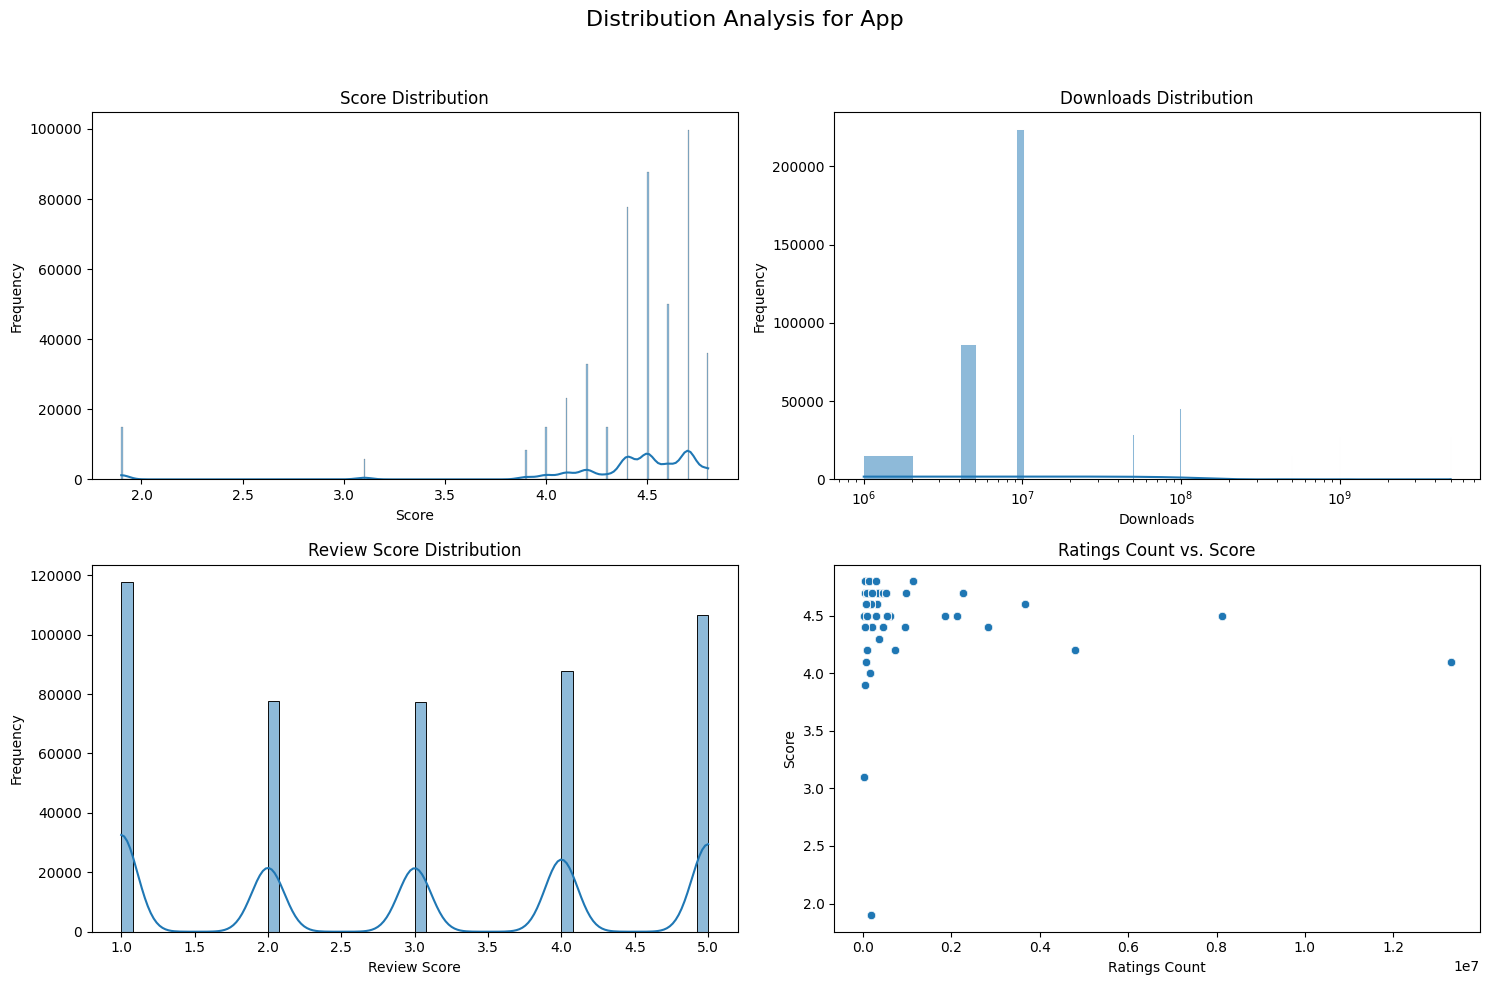

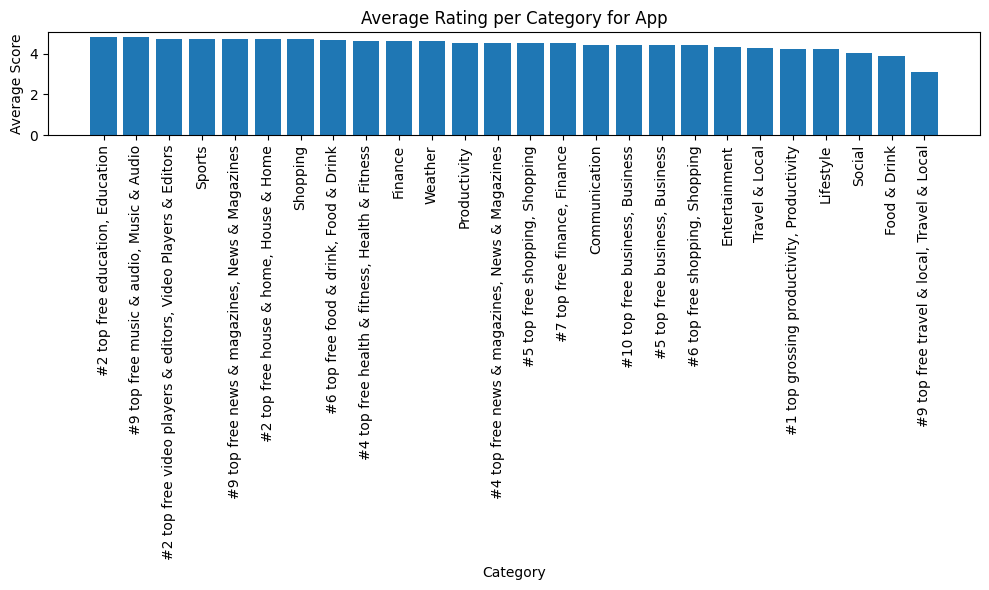

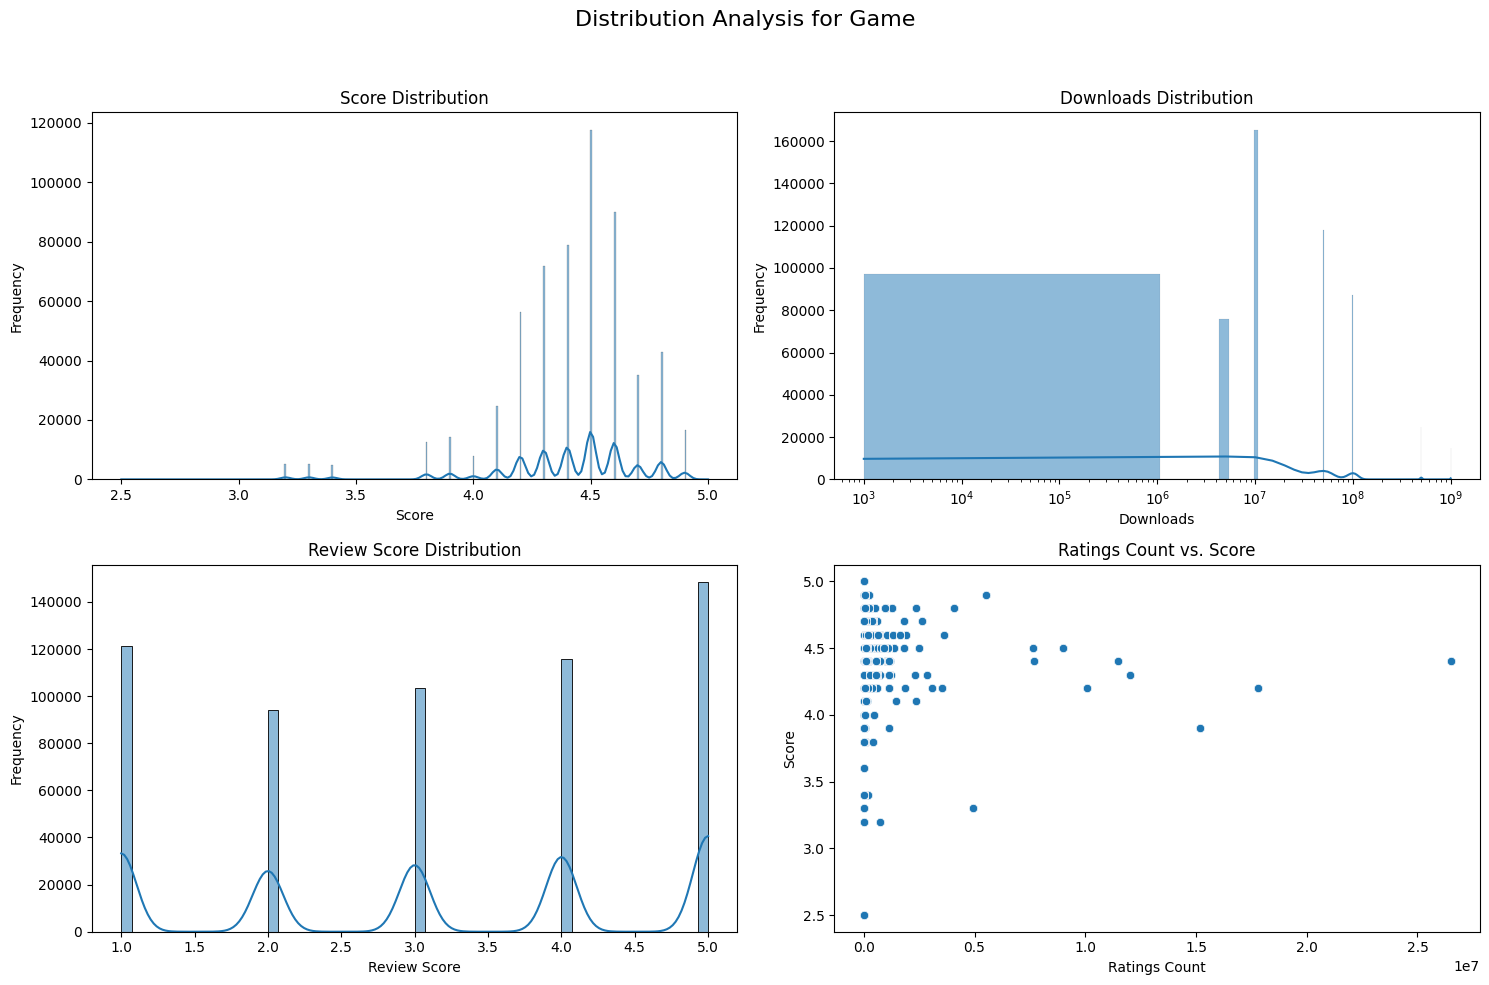

<ipython-input-6-6d5630dfd9fb>:46: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


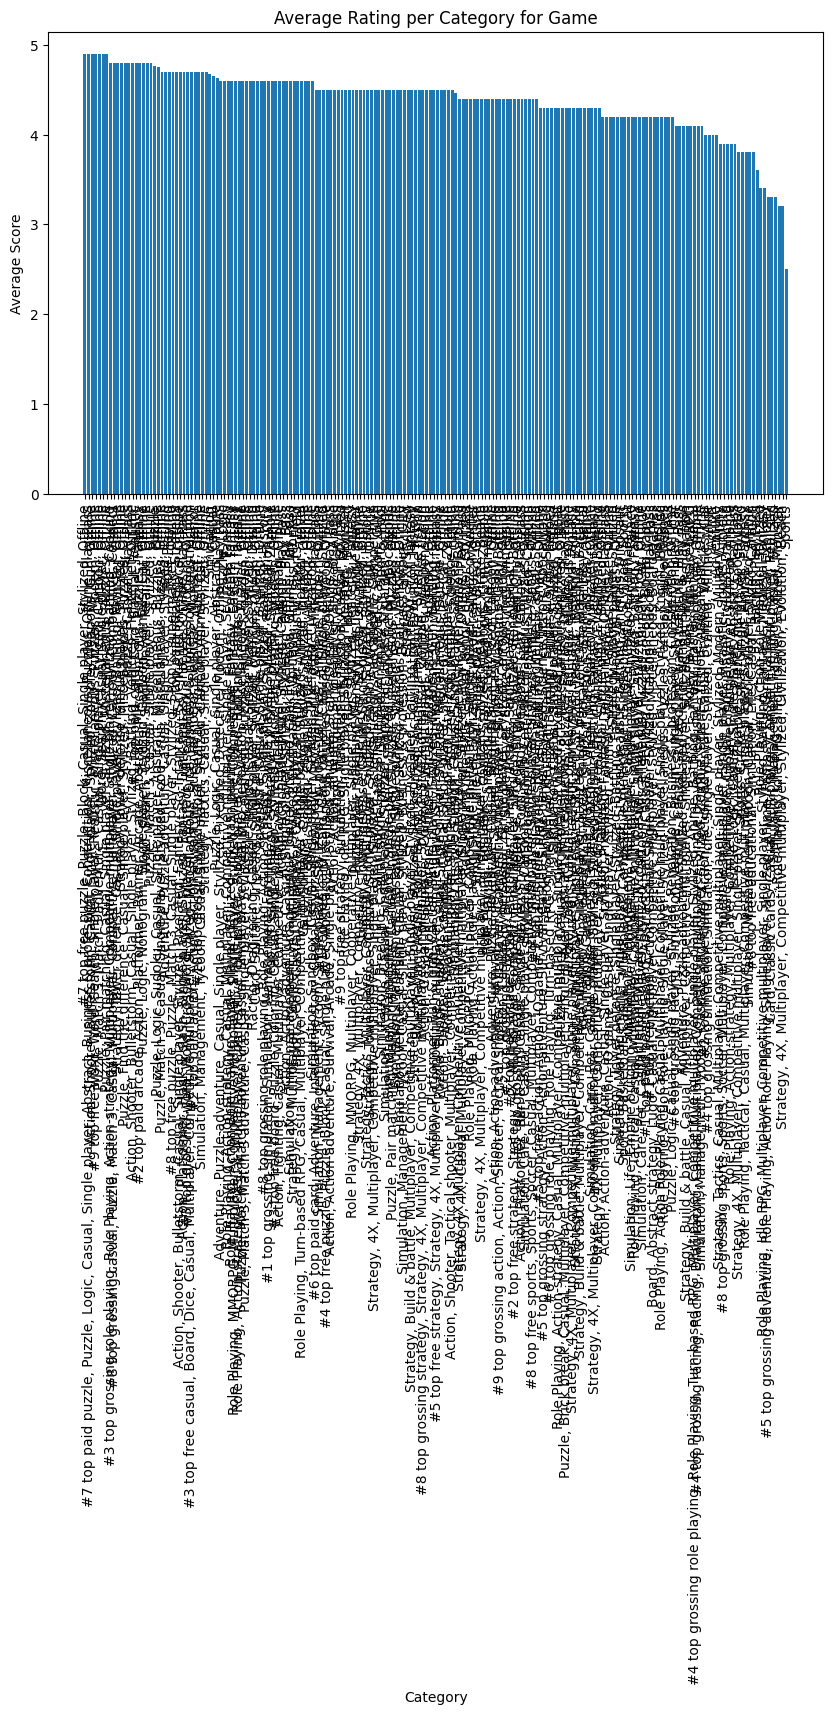

Comparison of apps and games:
              app_id          score  ratings_count     downloads  \
count  466700.000000  466700.000000   4.667000e+05  4.667000e+05   
mean       83.638290       4.384497   1.345375e+06  3.811604e+08   
min         1.000000       1.900000   1.490000e+04  1.000000e+06   
25%        14.000000       4.400000   1.510000e+05  1.000000e+07   
50%        58.000000       4.500000   4.520000e+05  1.000000e+07   
75%       140.000000       4.700000   9.700000e+05  5.000000e+07   
max       217.000000       4.800000   1.330000e+07  5.000000e+09   
std        69.396137       0.526411   2.540815e+06  1.167250e+09   

        review_score                 review_date  helpful_count  
count  466700.000000                      466700  466700.000000  
mean        2.973788  2022-03-07 01:52:17.978144      13.545132  
min         1.000000         2010-04-25 00:00:00       0.000000  
25%         1.000000         2020-06-11 00:00:00       0.000000  
50%         3.000000       

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution analysis
def analyze_distributions(df, app_or_game):
    plt.figure(figsize=(15, 10))
    plt.suptitle(f'Distribution Analysis for {app_or_game.capitalize()}', fontsize=16)

    plt.subplot(2, 2, 1)
    sns.histplot(df['score'], kde=True)
    plt.title('Score Distribution')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 2)
    sns.histplot(df['downloads'], kde=True)
    plt.title('Downloads Distribution')
    plt.xlabel('Downloads')
    plt.ylabel('Frequency')
    plt.xscale('log')

    plt.subplot(2, 2, 3)
    sns.histplot(df['review_score'], kde=True)
    plt.title('Review Score Distribution')
    plt.xlabel('Review Score')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 4)
    sns.scatterplot(x='ratings_count', y='score', data=df)
    plt.title('Ratings Count vs. Score')
    plt.xlabel('Ratings Count')
    plt.ylabel('Score')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Analysis by category
def analyze_category_ratings(df, app_or_game):
    if 'categories' in df.columns:
      category_ratings = df.groupby('categories')['score'].mean().sort_values(ascending=False)
      plt.figure(figsize=(10, 6))
      plt.bar(category_ratings.index, category_ratings.values)
      plt.xticks(rotation=90)
      plt.xlabel('Category')
      plt.ylabel('Average Score')
      plt.title(f'Average Rating per Category for {app_or_game.capitalize()}')
      plt.tight_layout()
      plt.show()


# Apps
analyze_distributions(df_apps_combined, 'app')
analyze_category_ratings(df_apps_combined, 'app')

# Games
analyze_distributions(df_games_combined, 'game')
analyze_category_ratings(df_games_combined, 'game')


# Comparison
print("Comparison of apps and games:")
print(df_apps_combined.describe())
print(df_games_combined.describe())

## Data visualization

### Subtask:
Visualize key findings from the data analysis.


**Reasoning**:
Visualize the key findings from the data analysis as instructed, including distributions of key variables, relationships between variables, and comparisons across categories.



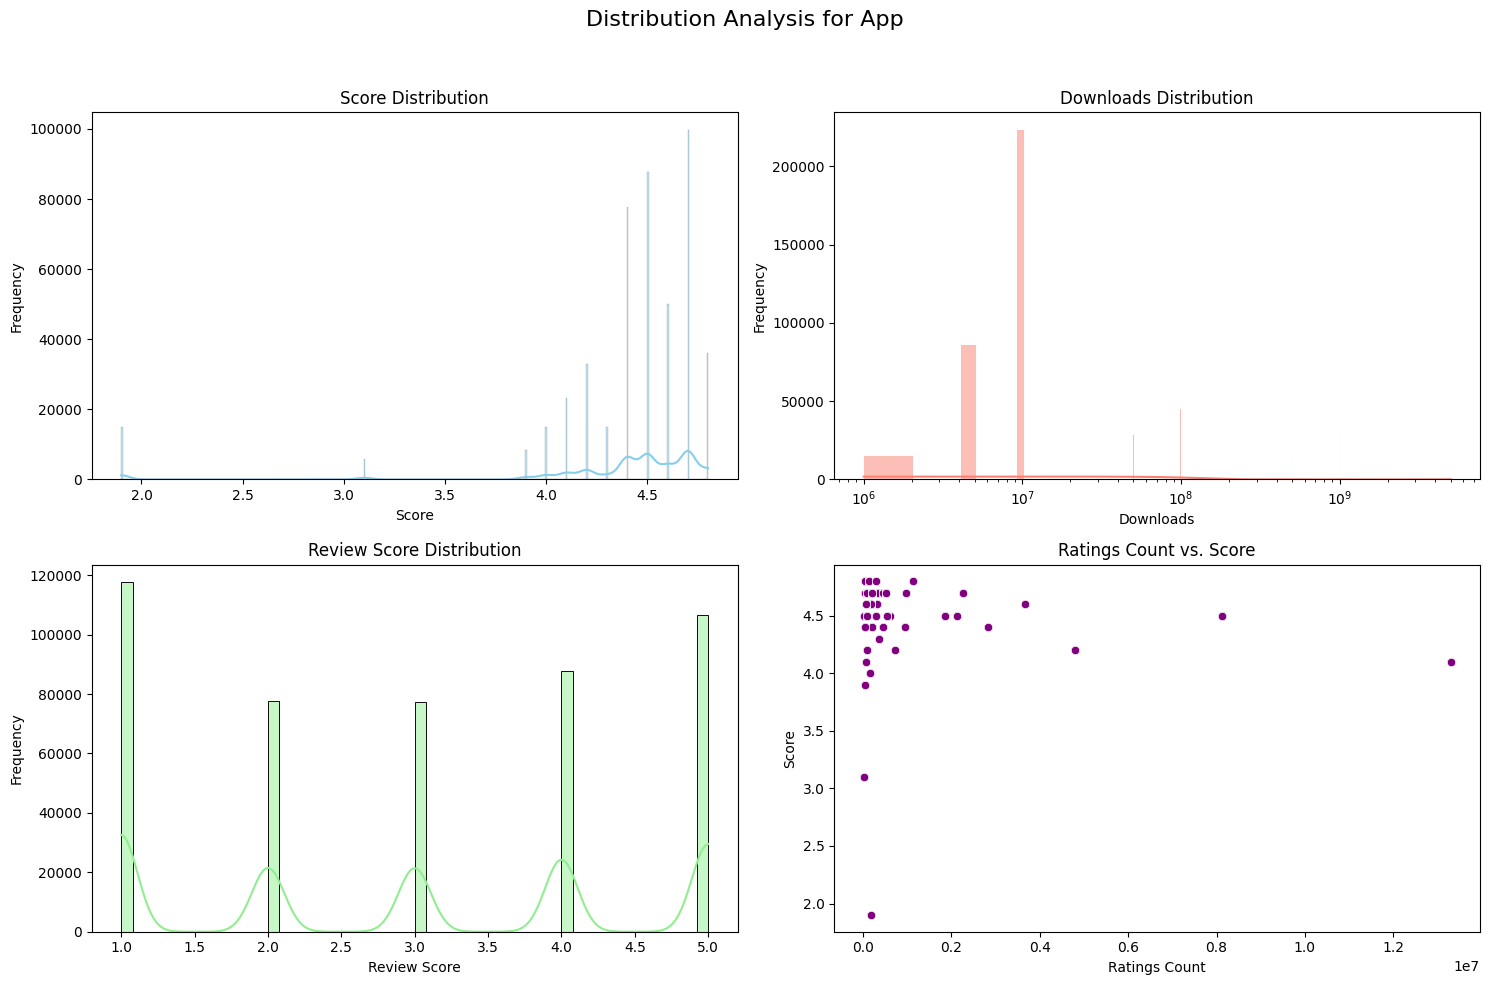

<ipython-input-7-5cb03006f232>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_ratings.index, y=category_ratings.values, palette="viridis")


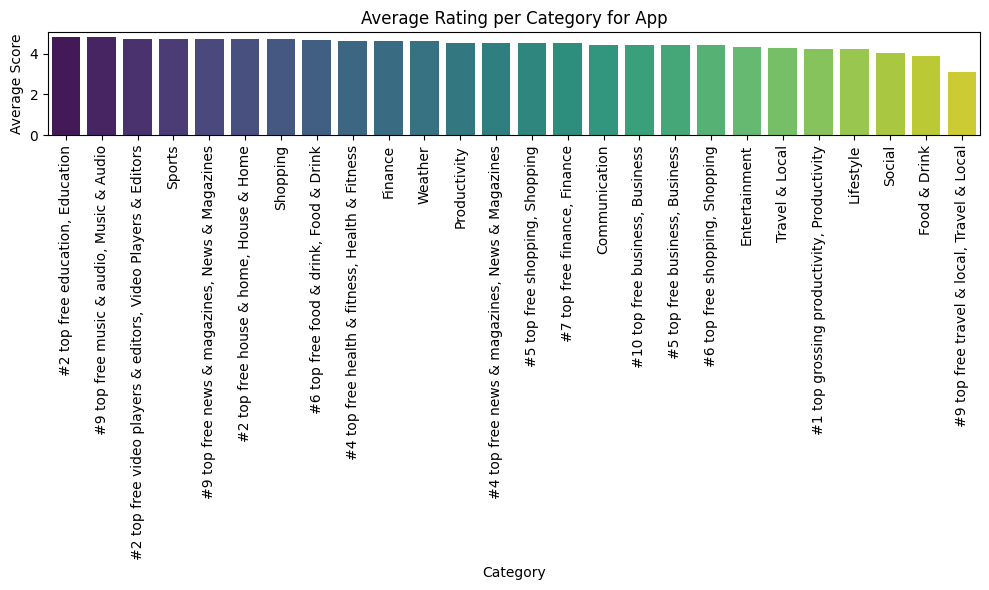

<ipython-input-7-5cb03006f232>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='content_rating', y='score', data=df, palette="magma")


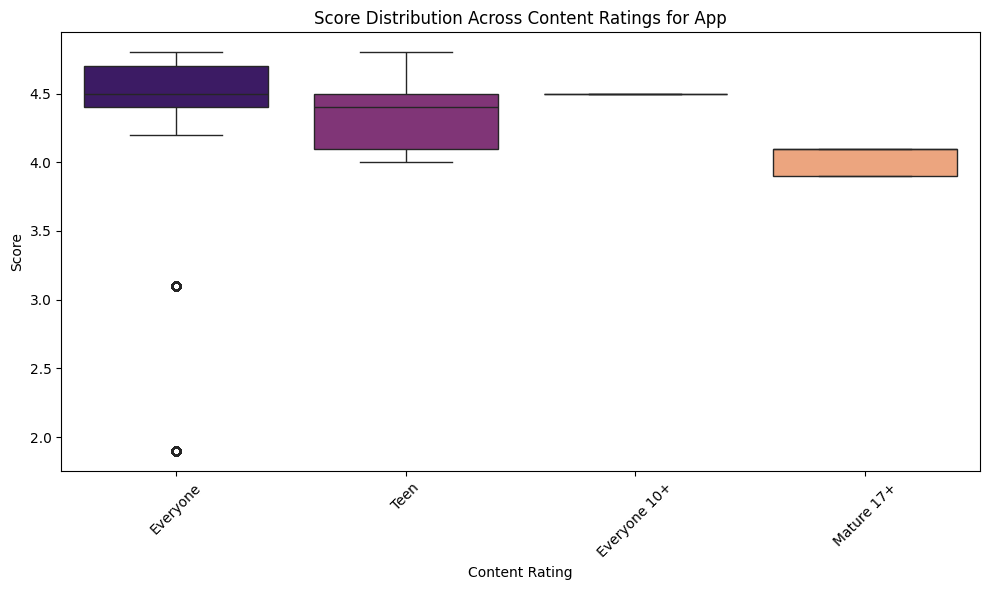

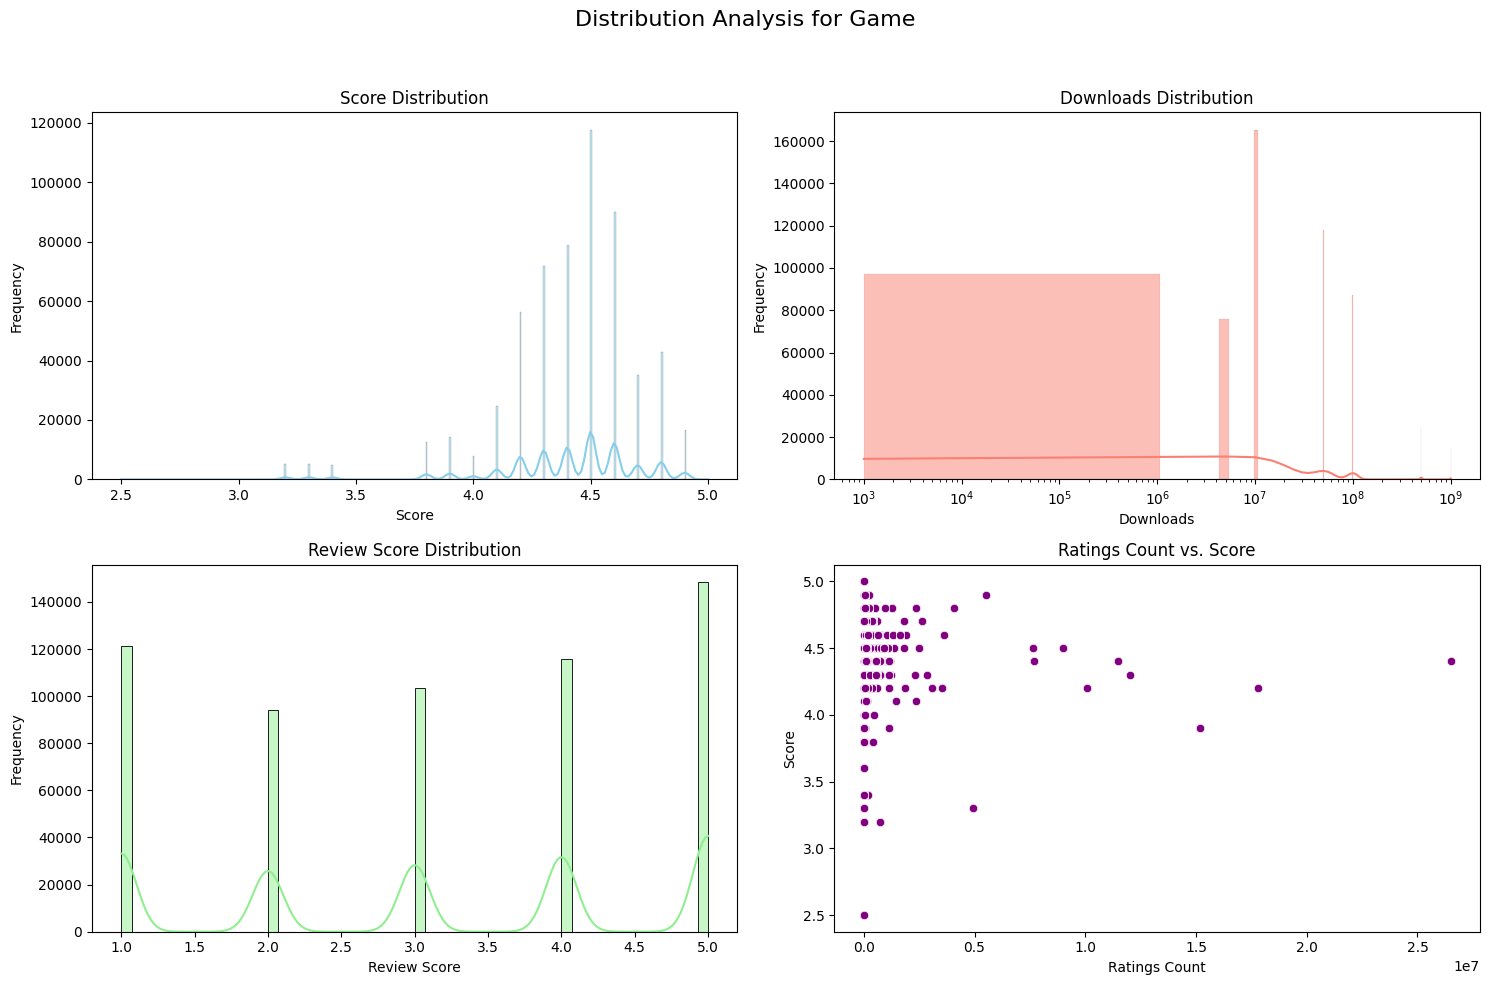

<ipython-input-7-5cb03006f232>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_ratings.index, y=category_ratings.values, palette="viridis")
<ipython-input-7-5cb03006f232>:46: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


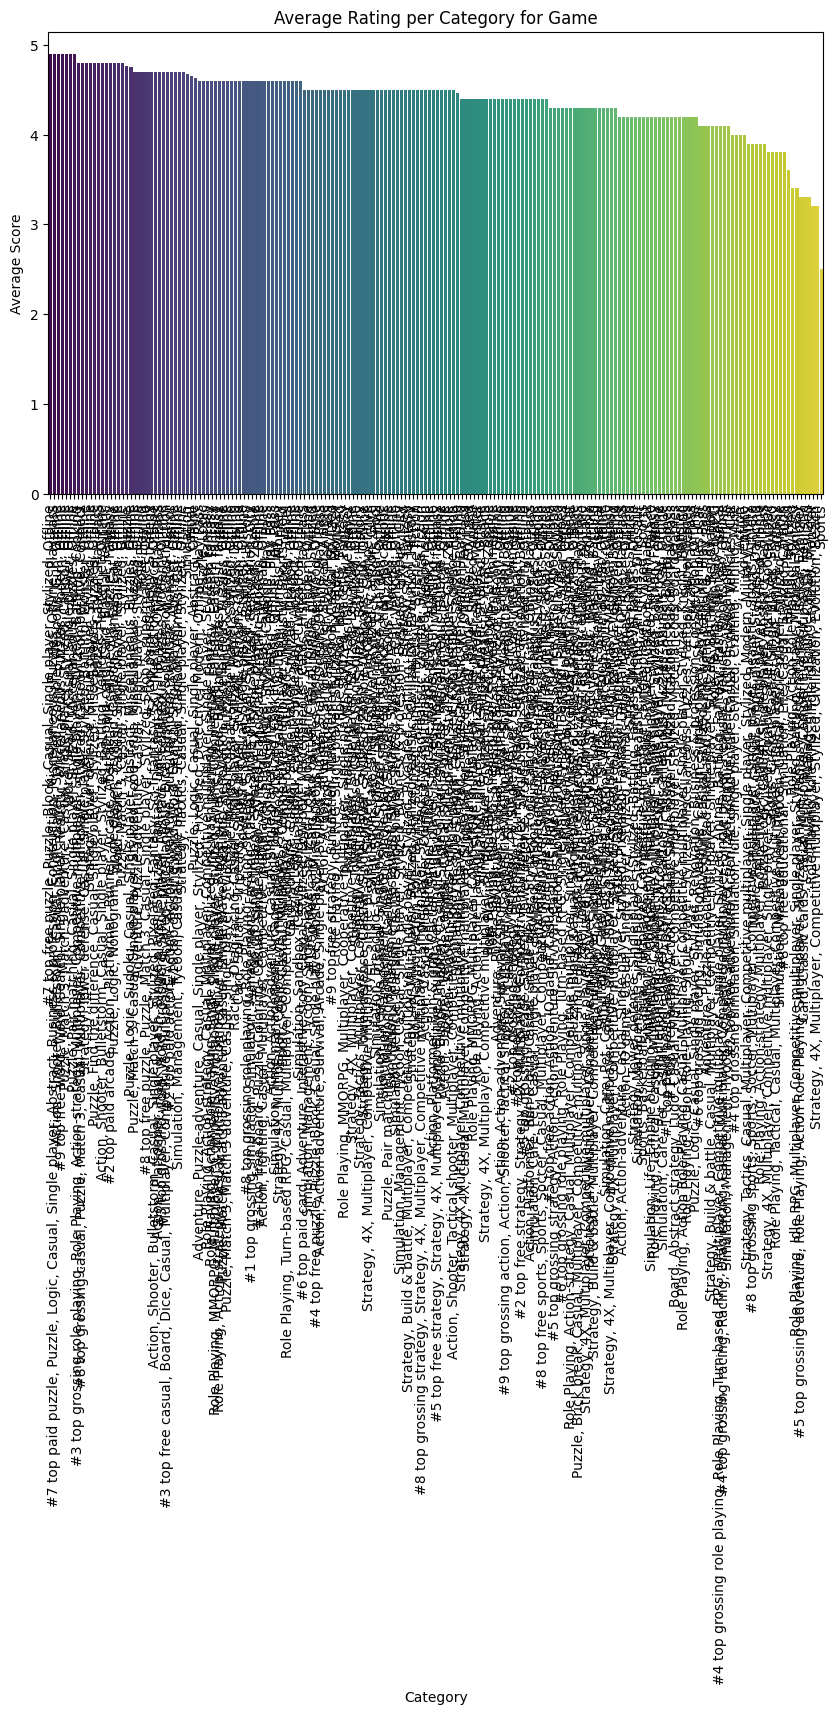

<ipython-input-7-5cb03006f232>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='content_rating', y='score', data=df, palette="magma")


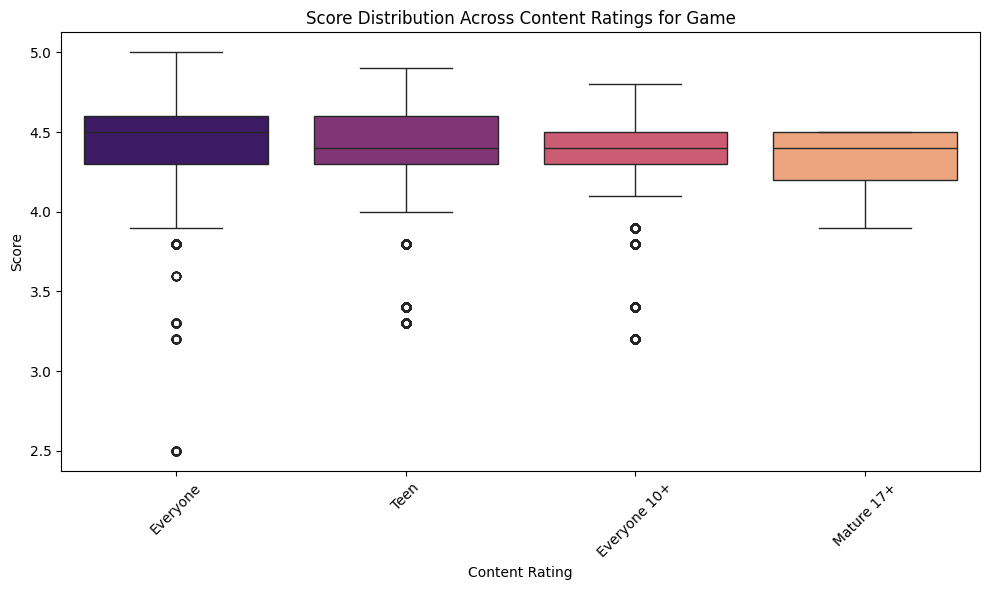

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution analysis
def analyze_distributions(df, app_or_game):
    plt.figure(figsize=(15, 10))
    plt.suptitle(f'Distribution Analysis for {app_or_game.capitalize()}', fontsize=16)

    plt.subplot(2, 2, 1)
    sns.histplot(df['score'], kde=True, color='skyblue')
    plt.title('Score Distribution')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 2)
    sns.histplot(df['downloads'], kde=True, color='salmon')
    plt.title('Downloads Distribution')
    plt.xlabel('Downloads')
    plt.ylabel('Frequency')
    plt.xscale('log')

    plt.subplot(2, 2, 3)
    sns.histplot(df['review_score'], kde=True, color='lightgreen')
    plt.title('Review Score Distribution')
    plt.xlabel('Review Score')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 4)
    sns.scatterplot(x='ratings_count', y='score', data=df, color='purple')
    plt.title('Ratings Count vs. Score')
    plt.xlabel('Ratings Count')
    plt.ylabel('Score')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Analysis by category
def analyze_category_ratings(df, app_or_game):
    if 'categories' in df.columns:
      category_ratings = df.groupby('categories')['score'].mean().sort_values(ascending=False)
      plt.figure(figsize=(10, 6))
      sns.barplot(x=category_ratings.index, y=category_ratings.values, palette="viridis")
      plt.xticks(rotation=90)
      plt.xlabel('Category')
      plt.ylabel('Average Score')
      plt.title(f'Average Rating per Category for {app_or_game.capitalize()}')
      plt.tight_layout()
      plt.show()

# Boxplots for score distribution across content ratings
def analyze_content_rating_impact(df, app_or_game):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='content_rating', y='score', data=df, palette="magma")
    plt.xticks(rotation=45)
    plt.title(f'Score Distribution Across Content Ratings for {app_or_game.capitalize()}')
    plt.xlabel('Content Rating')
    plt.ylabel('Score')
    plt.tight_layout()
    plt.show()

# Apps
analyze_distributions(df_apps_combined, 'app')
analyze_category_ratings(df_apps_combined, 'app')
analyze_content_rating_impact(df_apps_combined, 'app')

# Games
analyze_distributions(df_games_combined, 'game')
analyze_category_ratings(df_games_combined, 'game')
analyze_content_rating_impact(df_games_combined, 'game')